# Partícula en un Campo Eléctrico

## Análisis teórico



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os, ast

In [31]:
!python electron_on_charged_field.py \
    --n_charges 32 \
    --ring_radius 1e-9 \
    --charge_ring 1.28e-18 \
    --electron_x 0.5e-9 \
    --electron_vy 2e6 \
    --electron_vz 1e6 \
    --dt 1e-16 \
    --t_max 1.0e-6 \
    --filename "quasi_stable_orbit"

^C


In [27]:
!python electron_on_charged_field.py \
    --n_charges 48 \
    --ring_radius 2e-9 \
    --charge_ring 3.84e-18 \
    --electron_x 0.3e-9 \
    --electron_vy 3.5e6 \
    --dt 5e-17 \
    --t_max 3e-12 \
    --filename "high_symmetry_case"

Simulación completada. Datos guardados en data/high_symmetry_case.dat


In [19]:
def load_data(file_path="data/electron_ring_simulation.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot = data.T
    return t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot

def load_params(file_path="data/electron_ring_simulation_params.txt"): 
    with open(file_path) as f:
        params = ast.literal_eval(f.read())
    return params

In [32]:
path_quasi_stable = "data/quasi_stable_orbit.dat"
path_high_symmetry = "data/high_symmetry_case.dat"
t, x, y, z, vx, vy, vz, E_kin, E_pot, E_tot = load_data(file_path=path_high_symmetry)
params = load_params()

In [5]:
def plot_3d_trajectory(n_charges, x, y, z, show=True, save=False, filename=""):
    """
    Grafica la trayectoria 3D del electrón y el anillo de protones
    Args:
        n_charges (int): Número de protones en el anillo
        x, y, z (arrays): Posiciones del electrón
        show (bool): Mostrar gráfico interactivo
        save (bool): Guardar imagen
        filename (str): Nombre base del archivo
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(x, y, z, 'b-', linewidth=1.5, label='Trayectoria del electrón')
    ax.scatter(x[0], y[0], z[0], 'go', s=100, label='Posición inicial')
    ax.scatter(x[-1], y[-1], z[-1], 'ro', s=100, label='Posición final')
    
    theta = np.linspace(0, 2*np.pi, n_charges)
    ring_y = np.mean(y) * np.ones_like(theta)  # Centrar en el plano yz
    ring_z = np.mean(z) * np.ones_like(theta)
    
    ring_x = np.zeros_like(theta)
    ring_y = np.cos(theta) * np.max(np.sqrt(y**2 + z**2)) * 1.2  # Escalar para visualización
    ring_z = np.sin(theta) * np.max(np.sqrt(y**2 + z**2)) * 1.2
    
    ax.scatter(ring_x, ring_y, ring_z, 'co', s=50, label=f'Anillo ({n_charges} protones)')
    
    # Configuración del gráfico
    ax.set_xlabel('Posición X (m)')
    ax.set_ylabel('Posición Y (m)')
    ax.set_zlabel('Posición Z (m)')
    ax.set_title('Trayectoria del electrón en campo de anillo de protones')
    ax.legend()
    
    ax.view_init(elev=30, azim=45)

    if save:
        os.makedirs("plots", exist_ok=True)
        imname = f"_{filename}" if filename else ""
        plt.savefig(f"plots/positions{imname}.png", dpi=300, bbox_inches='tight')
        print(f"Gráfico guardado en plots/positions{imname}.png")
    
    if show:
        plt.show()
    
    plt.close()

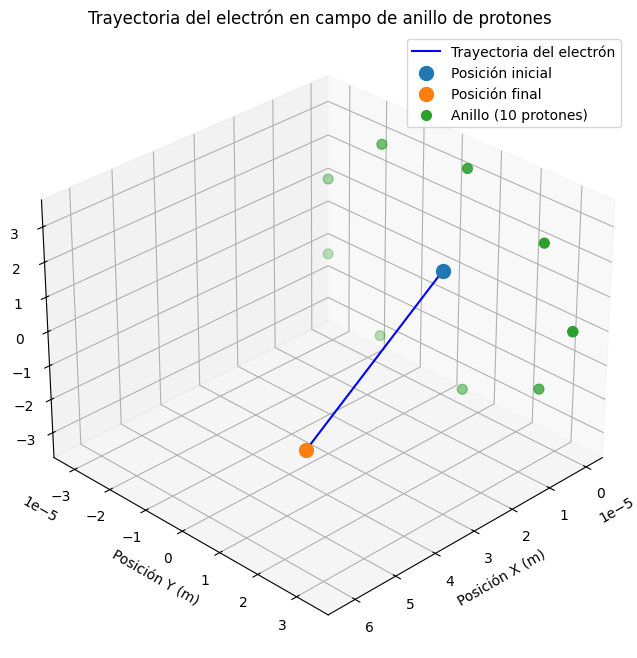

In [33]:
plot_3d_trajectory(n_charges=10, x=x, y=y, z=z, show=True, save=False, filename="quasi_stable_orbit")

In [34]:
from electron_on_charged_field import ChargedRingSystem, Simulator

In [ ]:
n_charges=10
ring_radius=1.0
charge_ring=1.0e-9
electron_position=[1.0, 0.0, 0.0]
electron_velocity=[0.0, 1.0e4, 0.0]
dt=1.0e-9
t_max=1.0e-6
filename="electron_ring_simulation"

system = ChargedRingSystem(
        n_charges=n_charges,
        ring_radius=ring_radius,
        charge_ring=charge_ring,
        electron_position=electron_position,
        electron_velocity=electron_velocity
    )
simulator = Simulator(system, filename)
simulator.simulate(t_max, dt)